                  
The Bubble Plot indicates that number of rides and drivers both are more in urban cities as compared to suburban and rural cities. Although average fare is more for suburban and rural cities for few instances.

Urban cities have the highest percentage of total fares at 62.7%.Even though rural cities had the highest average fare per city, the rural cities had the smallest segment of  total fares by city pie chart at 6.8%.

All three pie charts show that urban cities have a good percentage of total fare, total rides and total drivers.

From this analysis, this can be predicted that there are many new opportunities to expand the business in suburban and rural cities, in terms of hiring more drivers to operate in these cities.

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_to_load=pd.read_csv(city_data_to_load)
ride_data_to_load=pd.read_csv(ride_data_to_load)

In [2]:
# Combine the data into a single dataset
merge_ride=pd.merge(ride_data_to_load,city_data_to_load,on ="city", how="left")
# Display the data table for preview
merge_ride.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

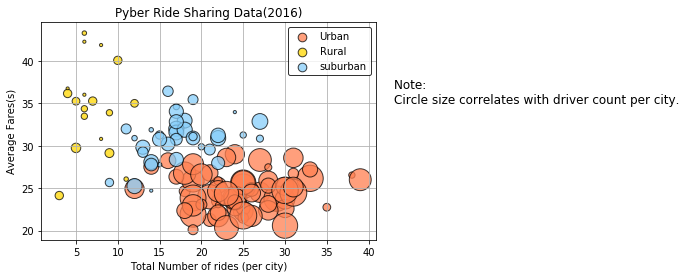

In [3]:
# Obtain the x and y coordinates for each of the three city types
urban_type = merge_ride["type"] == "Urban"
type_urban=merge_ride[urban_type].groupby(merge_ride["city"])

x_urban=type_urban["ride_id"].count()
y_urban=type_urban["fare"].mean()
s_urban=type_urban["driver_count"].mean()

rural_type = merge_ride["type"] == "Rural"
type_rural=merge_ride[rural_type].groupby(merge_ride["city"])

x_rural=type_rural["ride_id"].count()
y_rural=type_rural["fare"].mean()
s_rural=type_rural["driver_count"].mean()

Suburban_type = merge_ride["type"] == "Suburban"
type_Suburban=merge_ride[Suburban_type].groupby(merge_ride["city"])

x_suburban=type_Suburban["ride_id"].count()
y_suburban=type_Suburban["fare"].mean()
s_suburban=type_Suburban["driver_count"].mean()

# Build the scatter plots for each city types
urban_graph=plt.scatter(x_urban, y_urban, marker="o", facecolors="coral", edgecolors="black",label='Urban',
            s=s_urban*10, alpha=0.75)
rural_graph=plt.scatter(x_rural, y_rural, marker="o", facecolors="gold", edgecolors="black",label='Rural',
            s=s_rural*10, alpha=0.75)

suburban_graph=plt.scatter(x_suburban, y_suburban, marker="o", facecolors="lightskyblue", edgecolors="black",label='suburban',
            s=s_suburban*10, alpha=0.75)


# Prints the scatter plot to the screen

# Incorporate the other graph properties
plt.text(43,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 12)
# Create a legend
# Incorporate a text label regarding circle size
lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

# Give our chart some labels and a tile
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of rides (per city)")
plt.ylabel("Average Fares(s)")
# Save Figure

plt.grid()
plt.savefig("PyberRideScatter.png")




The clear majority of pyber rides and drivers are in the urban cities. However, the urban rides seem to consistently result a lower average fare than rides in suburban or rural cities.

In [4]:
# Show plot
plt.show()

## Total Fares by City Type

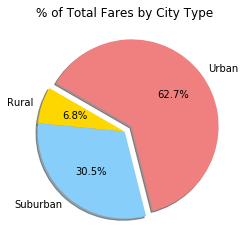

In [5]:
# Calculate Type Percents

city_type_Avg=merge_ride.groupby(["type"])
fare_city=city_type_Avg["fare"].sum()
fare_city

labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]



# Build Pie Chart
plt.pie(fare_city, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")



# Save Figure
plt.savefig("PyberRide_TotalFares.png")

The majority of pyber revenue comes from pyber urban , with 62.7%. However, at 30.5%, pyber suburban customers still account for a significant portion of pyber fare revenue, since they have, on average, consistently higher average fares.

In [6]:
# Show Figure
plt.show()

## Total Rides by City Type

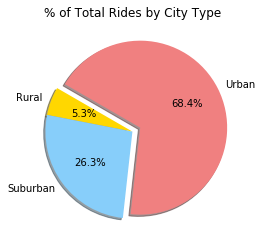

In [7]:
# Calculate Ride Percents

city_ride_Avg=merge_ride.groupby(["type"])
ride_city=city_ride_Avg["ride_id"].count()
ride_city

labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]



# Build Pie Chart
plt.pie(ride_city, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")



# Save Figure
plt.savefig("PyberRidePie_Total_ride.png")



The urban cities have a good percentage of total rides.But suburban have more on rides percent 26.3% compared to rural areas 5.3%.

In [8]:
# Show Figure
plt.show()

## Total Drivers by City Type

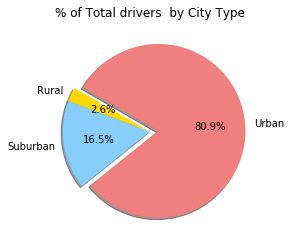

In [9]:
# Calculate Driver Percents
city_driver_Avg=city_data_to_load.groupby(["type"]).sum()
city_driver_Avg


labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]



# Build Pie Chart
plt.pie(city_driver_Avg, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total drivers  by City Type")



# Save Figure
plt.savefig("PyberRidePie_Total_Driver.png")



In [10]:
# Show Figure
plt.show()

The vast majority of pyber drivers are located in urban cities. 